# Data Science - practicum

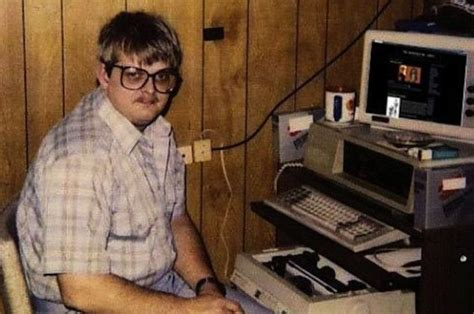

## Opdracht 1: Sea Level Change
### Global Average Absolute Sea Level Change, 1880-2014

https://www.kaggle.com/datasets/somesh24/sea-level-change

### Doel

- Inzicht in zeespiegelstijging
- Model maken dat stijging kan voorspellen

### Stap 1: Data inladen

In [92]:
import pandas as pd
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt

In [93]:
# Use pandas to load 'sea_levels_2015.csv'
df_sl = pd.read_csv('../data/sea_levels_2015.csv')

df_sl.isnull().sum()

# ...

# To check if this set is complete, use:

# levels.isnull().sum()

Time                0
GMSL                0
GMSL uncertainty    0
dtype: int64

### Stap 2: Data bekijken

<AxesSubplot: xlabel='Time'>

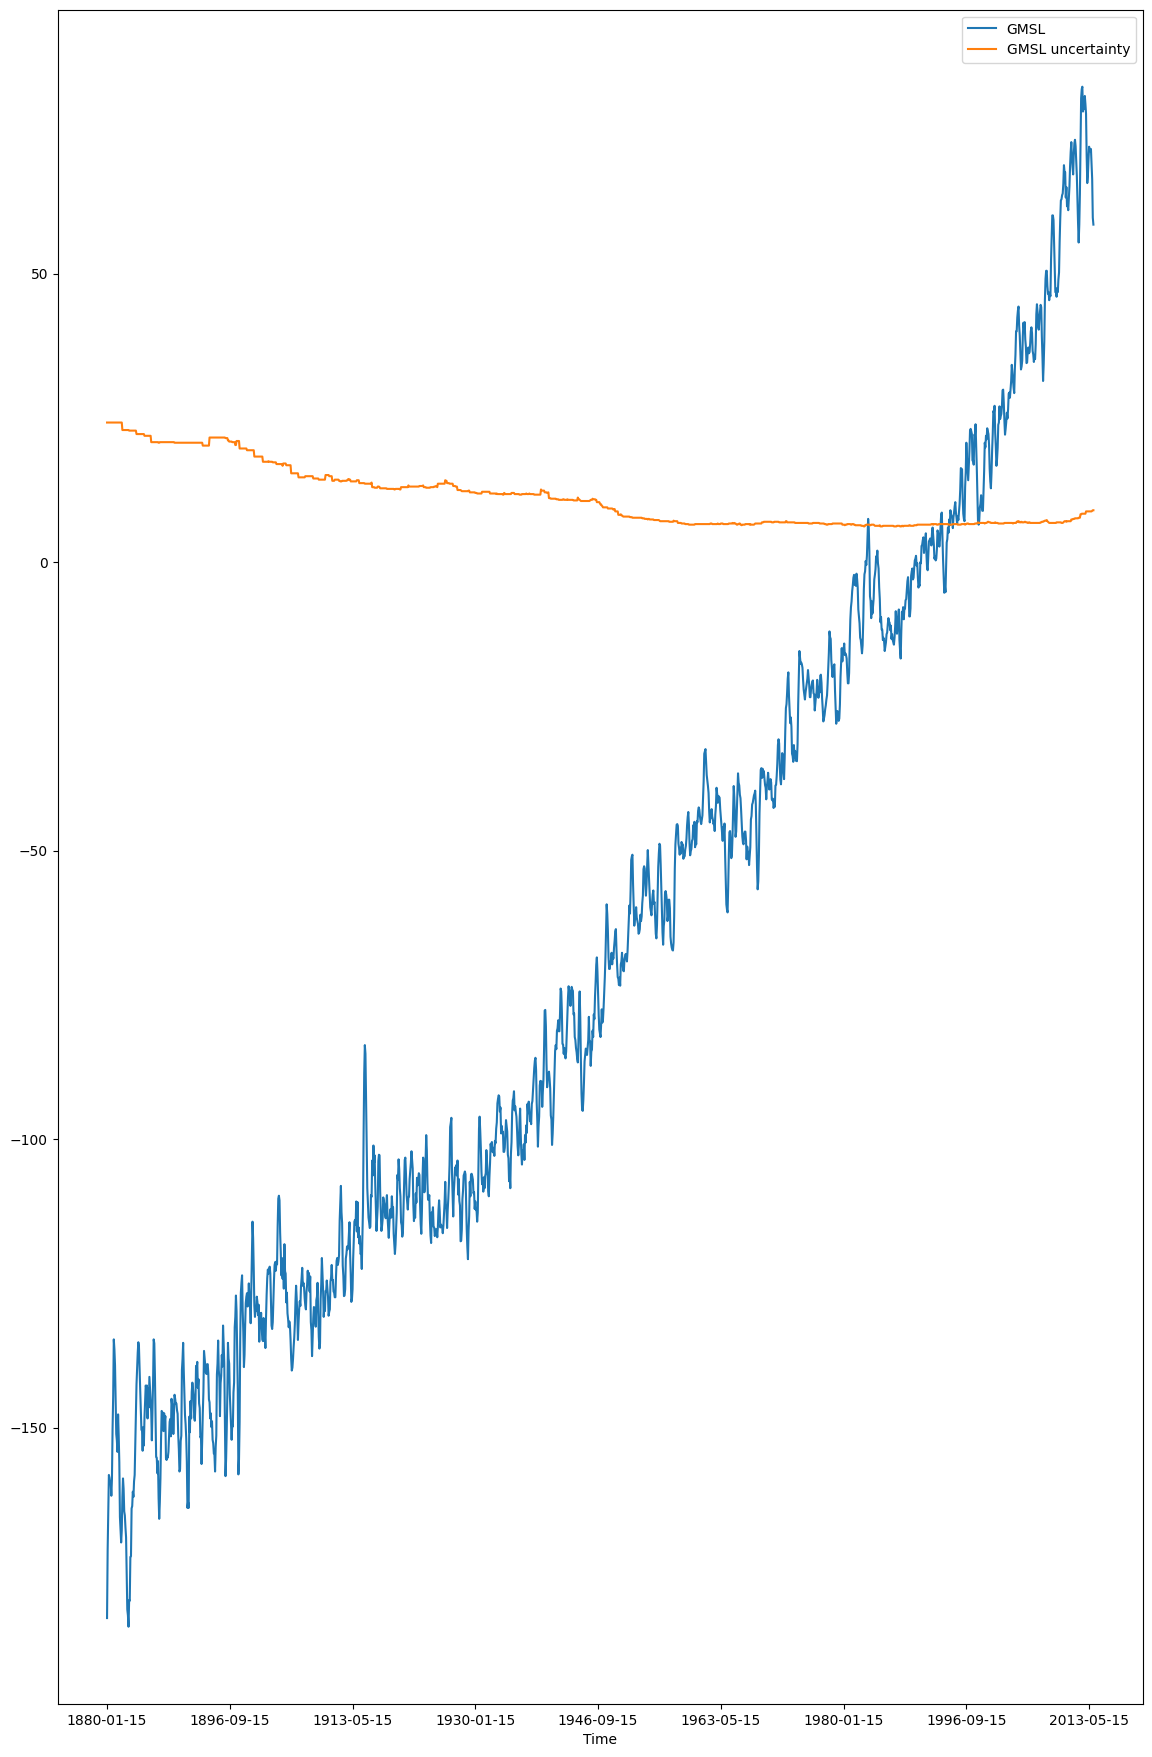

In [94]:
# Plot the sea level data
plt.figure(figsize=[14,22])
ax =plt.gca()
df_sl.plot('Time',ax=ax)
# ...

### Stap 3: Trends zoeken

- Zijn er trends zichtbaar in de data?
- Zo ja, welke zijn dat?
- Zoom desnoods wat in; neem als range 1 jaar

Bouw op basis van deze inzichten een model.

(array([ 1.00000000e+00,  1.33088660e-01,  1.33632474e-01,  9.99067851e-01,
       -1.73016423e+02]), array([[inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf]]))


c:\Users\marcr\MakeAIWork3\env_miw3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


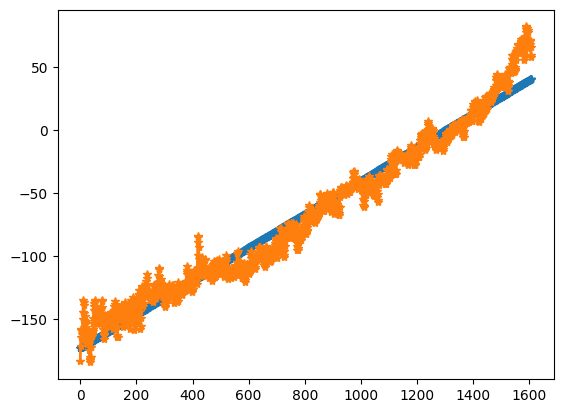

In [120]:
#def modelfunc(x,b,c,d,x):
#     x=np.array(x)
#     return b*x**2+c*x+d 
def modelfunc(x,a,b,c,d,e):
     #x=np.array(x)
     return b*x+c*np.sin(d*x)+e 
     #return b*x**2+c*np.sin(x)+d
     #return a*np.exp(x)+d
     #return a*x+d

# Fit your model
dt = pd.to_datetime(df_sl['Time'])

x = np.arange(df_sl['Time'].shape[0])
fit_result =sp.optimize.curve_fit(modelfunc,x,df_sl['GMSL'])
#fit_result =sp.optimize.curve_fit(modelfunc,df_sl['Time'],np.array(df_sl['GMSL']))
print(fit_result)
# Plot your fit
pred_sl= modelfunc(x,*fit_result[0])
ax = plot_init()
plot_add(ax,x,pred_sl)
plot_add(ax,x,df_sl['GMSL'])
plot_show()

#plt.plot(dt,pred_sl)
# ...

In [110]:
df_time = df_sl['Time']
type(df_time[0])
dt = pd.to_datetime(df_sl['Time'])

### Stap 4: Voorspellen

Kun je op basis van je model voorspellen wat de gemiddelde zeespiegel is in 2100?

In [44]:
dt.shape

(1608,)

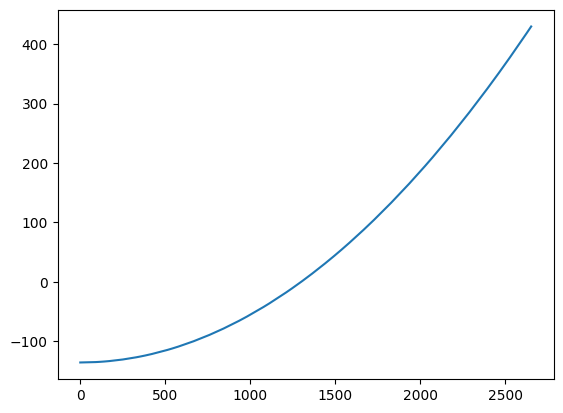

In [114]:
# Extrapolate to 2100 with your model

import datetime

yearpred = 2100
#timeend = datetime.datetime(2100,1,1)
#timedelta = timeend - dt[dt.shape[0]-1]
yearlast = dt[dt.shape[0]-1].year

deltayear = yearpred-yearlast

nr_timesteps = dt.shape[0]+deltayear*12 #tijdstap  = maand 

a,b,c,d=fit_result[0]
sl_2100= modelfunc(np.arange(nr_timesteps),a,b,c,d)
#sl_2100= modelfunc(range(nr_timesteps),*fit_result[0])

plt.plot(sl_2100)



# ...

# Optional: can you plot the future up to 2100?

# ...

Is je uitkomst verontrustend?

## Opdracht 2: COVID-19
### Visualizations, Predictions, Forecasting

https://www.kaggle.com/code/neelkudu28/covid-19-visualizations-predictions-forecasting

### Doel

- Inzicht in verloop COVID in India
- Model maken dat verloop kan voorspellen
- Ervaren hoe het is om met beperkte data de toekomst te moeten voorspellen

### Stap 1: Data inladen

In [136]:
# Use pandas to load 'covid_19_data.csv'
pd_cov = pd.read_csv('../data/covid_19_data.csv')

pd_cov.keys()
#set(pd_cov['Country/Region'].to_list())
# ...

# To check if this set is complete, use:

# covid.isnull().sum()

         SNo ObservationDate Province/State Country/Region  \
430      431      01/30/2020            NaN          India   
491      492      01/31/2020            NaN          India   
547      548      02/01/2020            NaN          India   
607      608      02/02/2020            NaN          India   
672      673      02/03/2020            NaN          India   
...      ...             ...            ...            ...   
98181  98182      08/29/2020        Tripura          India   
98194  98195      08/29/2020        Unknown          India   
98203  98204      08/29/2020  Uttar Pradesh          India   
98204  98205      08/29/2020    Uttarakhand          India   
98230  98231      08/29/2020    West Bengal          India   

               Last Update  Confirmed  Deaths  Recovered  
430          1/30/20 16:00        1.0     0.0        0.0  
491        1/31/2020 23:59        1.0     0.0        0.0  
547         1/31/2020 8:15        1.0     0.0        0.0  
607    2020-02-02T0

### Stap 2: Filteren

We gaan het verloop van India bekijken.

In [139]:
# Put the India data in an india dataframe
pd_cov_ind = pd_cov[pd_cov['Country/Region']=='India']
print(pd_cov_ind.keys())

# ...

# Make a new column with the active cases, use:
pd_cov_ind['Active'] = pd_cov_ind['Confirmed'] - pd_cov_ind['Recovered']-pd_cov_ind['Deaths']
print(pd_cov_ind)
# Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')
         SNo ObservationDate Province/State Country/Region  \
430      431      01/30/2020            NaN          India   
491      492      01/31/2020            NaN          India   
547      548      02/01/2020            NaN          India   
607      608      02/02/2020            NaN          India   
672      673      02/03/2020            NaN          India   
...      ...             ...            ...            ...   
98181  98182      08/29/2020        Tripura          India   
98194  98195      08/29/2020        Unknown          India   
98203  98204      08/29/2020  Uttar Pradesh          India   
98204  98205      08/29/2020    Uttarakhand          India   
98230  98231      08/29/2020    West Bengal          India   

               Last Update  Confirmed  Deaths  Recovered   Active  
430          1/30/20 16:00        1.0

C:\Users\marcr\AppData\Local\Temp\ipykernel_21156\3077916769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_cov_ind['Active'] = pd_cov_ind['Confirmed'] - pd_cov_ind['Recovered']-pd_cov_ind['Deaths']


### Stap 3: Range selecteren

De uitbraak is in volle gang.

In [166]:
print(pd_cov_ind['datetime'].dtype)

datetime64[ns]


In [172]:
# Select the range from februari to july
dt_cov = pd.to_datetime(pd_cov_ind['ObservationDate'])
#print(dt_cov)
pd_cov_ind['datetime']=dt_cov

bla = pd_cov_ind[(dt_cov>datetime.datetime(2020,2,1)) & (dt_cov<datetime.datetime(2020,7,1))]
print(bla)
print(bla.shape)
print(pd_cov_ind.shape)

# ...

         SNo ObservationDate Province/State Country/Region  \
607      608      02/02/2020            NaN          India   
672      673      02/03/2020            NaN          India   
740      741      02/04/2020            NaN          India   
810      811      02/05/2020            NaN          India   
881      882      02/06/2020            NaN          India   
...      ...             ...            ...            ...   
53859  53860      06/30/2020        Tripura          India   
53873  53874      06/30/2020        Unknown          India   
53880  53881      06/30/2020  Uttar Pradesh          India   
53881  53882      06/30/2020    Uttarakhand          India   
53907  53908      06/30/2020    West Bengal          India   

               Last Update  Confirmed  Deaths  Recovered  Active   datetime  
607    2020-02-02T06:03:08        2.0     0.0        0.0     2.0 2020-02-02  
672    2020-02-03T21:43:02        3.0     0.0        0.0     3.0 2020-02-03  
740    2020-02-03T21:

C:\Users\marcr\AppData\Local\Temp\ipykernel_21156\1943441309.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_cov_ind['datetime']=dt_cov


TypeError: unsupported operand type(s) for +: 'int' and 'str'

### Stap 4: Voorspellen

Aan jou de taak om het verloop tot en met december te voorspellen.

In [179]:
print(pd_cov_ind.isnull().sum()) 
#mooi, voor alle dagen hebben we data 

# Eerst groeperen op datum.
temp = pd_cov_ind.groupby(pd_cov_ind['datetime'])
print(temp.aggregate({'Active':'sum'}))

SNo                  0
ObservationDate      0
Province/State     132
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
Active               0
datetime             0
dtype: int64
              Active
datetime            
2020-01-30       1.0
2020-01-31       1.0
2020-02-01       1.0
2020-02-02       2.0
2020-02-03       3.0
...              ...
2020-08-25  706851.0
2020-08-26  725991.0
2020-08-27  742023.0
2020-08-28  752424.0
2020-08-29  765302.0

[213 rows x 1 columns]


In [101]:
# def model(a, b, c, ...):
#   ...
def model:
    

# Fit your model

# ...

# Plot your fit up to december

# ...

Zit je er ver naast?

## Opdracht 3: Coca Cola Stock
### Performance of Coca Cola Stock from 1962 to today

https://www.kaggle.com/datasets/kalilurrahman/coca-cola-stock-live-and-updated

### Doel

- De koers van Coca Cola voorspellen
- Rijk worden!!!

### Stap 1: Data inladen

In [102]:
# Use pandas to load 'coca_cola_stock_history.csv'

# ...

# To check if this set is complete, use:

# levels.isnull().sum()

### Stap 2: Range selecteren

Het is het jaar 1997 dus je beschikt over aardig wat koersdata.

In [103]:
# Select the data between begin 1962 and end 1997

# ...

### Stap 3: Tends zoeken

- Zijn er trends zichtbaar in de data?
- Zo ja, welke zijn dat?

Bouw op basis van deze inzichten een model.

In [104]:
# def model(a, b, c, ...):
#   ...

# Fit your model

# ...

# Plot your fit

# ...

### Stap 4: Big bet

- Doe op basis van je model een voorspelling voor december 2021

Dit is de prijs die je gaat betalen voor je _future_.

In [105]:
# Extrapolate to 2021 with your model

# ...

### Stap 5: Winning...?

Je hebt 10.000 _futures_ Coca Cola gekocht. Dit betekent dat je de aandelen Coca Cola MOET kopen.

- Als de waarde lager is dan je voorspelling: bingo!

In [106]:
# Compute your profit or loss

# ...

...or losing? Hoeveel geld heb je gewonnen / verloren?